In [1]:
from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("Features11PM.csv")

In [3]:
df = df.query('PassesPer90 > 0 and TacklesPer90 > 0')

In [4]:
X = df[['AveragePassXLocation','AveragePassYAbs','AverageXTackle','AverageYAbsTackle','ShotsPer90','PassesPer90','OffsidesPer90','GoalsPer90','AssistsPer90','TacklesPer90','LongBallsPer90','TakeOnsPer90','Own3rdHeadersPer90','Mid3rdHeadersPer90','Att3rdHeadersPer90','IntPer90','AveragePassLength']].values
y = np.array(df['Player'])

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(np_scaled)
df_normalized
X = df_normalized.values

Automatically created module for IPython interactive environment
For n_clusters = 4 Average silhouette_score is : 0.29095640052


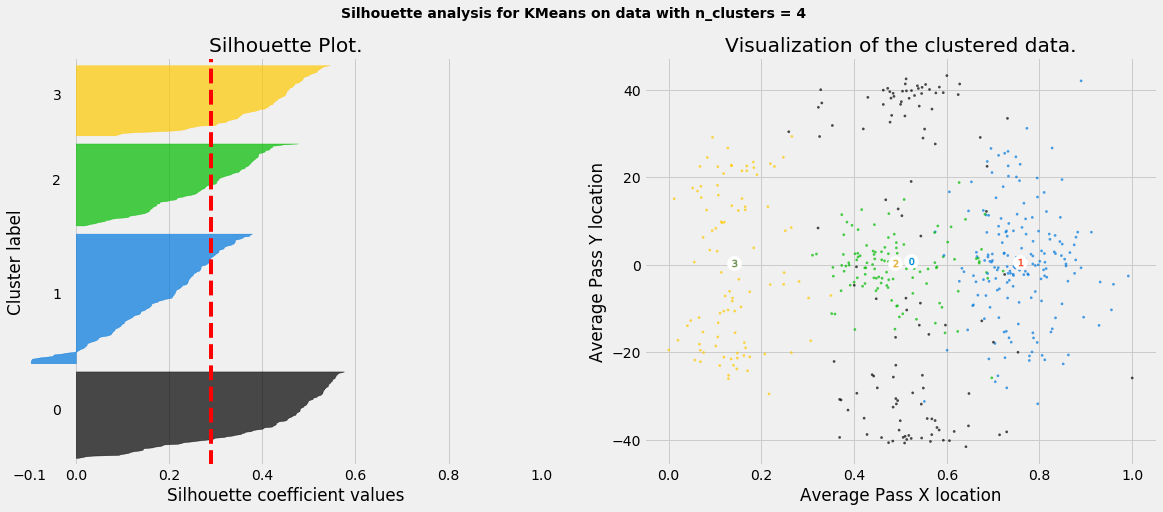

In [6]:
print(__doc__)

range_n_clusters = [4]

for n_clusters in range_n_clusters:
    # Create subplot with 1 row and 2 cols
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=3)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "Average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples belonging to
        # cluster i, and sort
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers at middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], np.array(df['AveragePassYlocation']), marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Average Pass X location")
    ax2.set_ylabel("Average Pass Y location")

    plt.suptitle(("Silhouette analysis for KMeans on data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [7]:
df['cluster'] = cluster_labels

In [8]:
cluster_df = df[['Player','cluster']].copy()

cluster_df.to_csv('clusters.csv')

In [9]:
defence_df = df.query('cluster == 3').copy()
attack_df = df.query('cluster == 1').copy()
mid_df = df.query('cluster == 2').copy()
lateral_df = df.query('cluster == 0').copy()

Automatically created module for IPython interactive environment
For n_clusters = 2 Average silhouette_score is : 0.219150636962


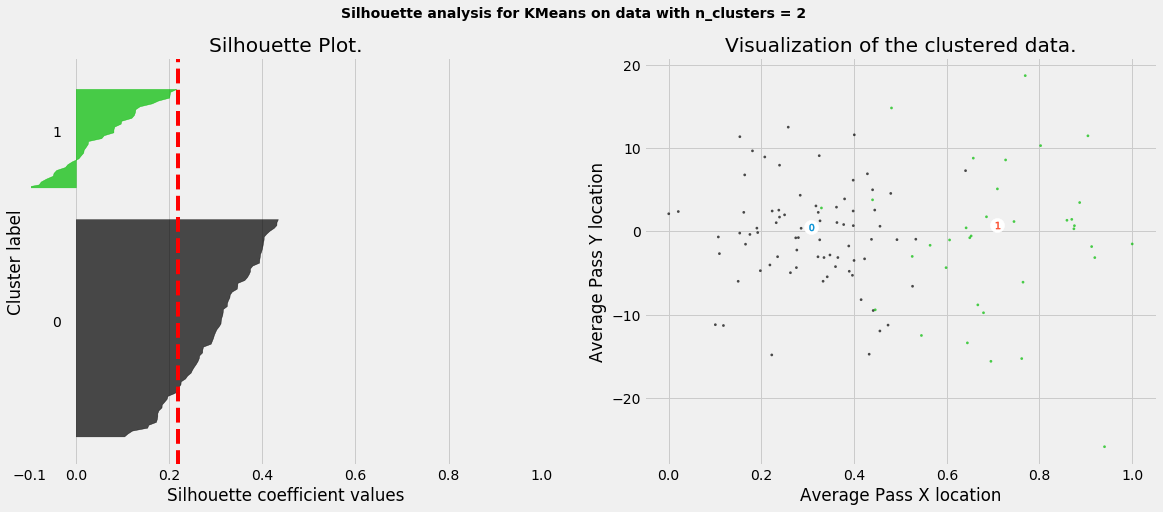

In [10]:
X = mid_df[['AveragePassXLocation','AveragePassYAbs','AverageXTackle','AverageYAbsTackle','ShotsPer90','PassesPer90','OffsidesPer90','GoalsPer90','AssistsPer90','TacklesPer90','LongBallsPer90','TakeOnsPer90','Own3rdHeadersPer90','Mid3rdHeadersPer90','Att3rdHeadersPer90','IntPer90','AveragePassLength']].values
y = np.array(mid_df['Player'])

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(np_scaled)
df_normalized
X = df_normalized.values

print(__doc__)

range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create subplot with 1 row and 2 cols
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=3)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "Average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples belonging to
        # cluster i, and sort
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers at middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], np.array(mid_df['AveragePassYlocation']), marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Average Pass X location")
    ax2.set_ylabel("Average Pass Y location")

    plt.suptitle(("Silhouette analysis for KMeans on data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [11]:
mid_df['clusters'] = cluster_labels

In [12]:
attack_df = attack_df.query('PassesPer90 > 0 and TacklesPer90 > 0 and ShotsPer90 > 0')

Automatically created module for IPython interactive environment
For n_clusters = 3 Average silhouette_score is : 0.136214372408


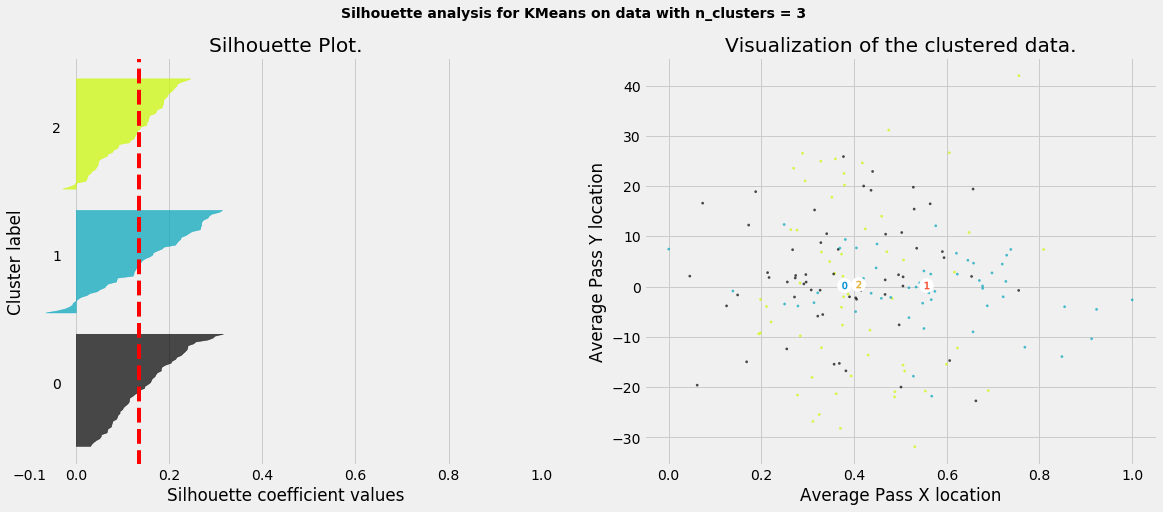

In [13]:
X = attack_df[['AveragePassXLocation','AveragePassYAbs','AverageXTackle','AverageYAbsTackle','ShotsPer90','PassesPer90','OffsidesPer90','GoalsPer90','AssistsPer90','TacklesPer90','LongBallsPer90','TakeOnsPer90','Own3rdHeadersPer90','Mid3rdHeadersPer90','Att3rdHeadersPer90','IntPer90','AveragePassLength','AvgShotDist','AvgxShot','Avgyabsshot']].values
y = np.array(attack_df['Player'])

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
df_normalized = pd.DataFrame(np_scaled)
df_normalized
X = df_normalized.values

print(__doc__)

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create subplot with 1 row and 2 cols
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=3)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "Average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for samples belonging to
        # cluster i, and sort
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with cluster numbers at middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], np.array(attack_df['AveragePassYlocation']), marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Visualization of the clustered data.")
    ax2.set_xlabel("Average Pass X location")
    ax2.set_ylabel("Average Pass Y location")

    plt.suptitle(("Silhouette analysis for KMeans on data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [14]:
attack_df['clusters'] = cluster_labels

In [15]:
defence_df['clusters'] = 0
lateral_df['clusters'] = 0

In [16]:
frames = [defence_df,
         attack_df,
         mid_df,
         lateral_df]

frame = pd.concat(frames)

In [17]:
frame['role'] = 10*frame['cluster']+frame['clusters']

In [18]:
cluster2_df = frame[['Player','role']].copy()

cluster2_df.to_csv('roles.csv')